# Bibliotecas

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator

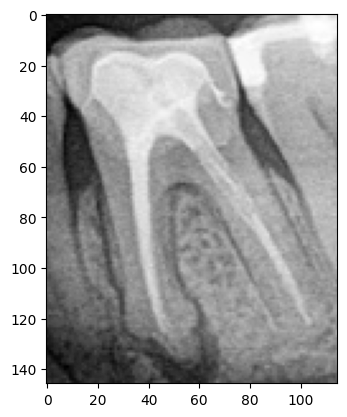

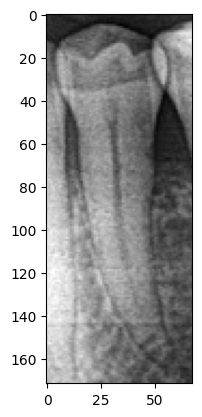

In [ ]:
def load_and_show_image(path):
    image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
    plt.imshow(image, cmap='gray')
    plt.show()
    return image

path_canal = '/content/Dente com Canal.PNG'
path_saudavel = '/content/dente Saudavel.PNG'

image_canal = load_and_show_image(path_canal)
image_saudavel = load_and_show_image(path_saudavel)

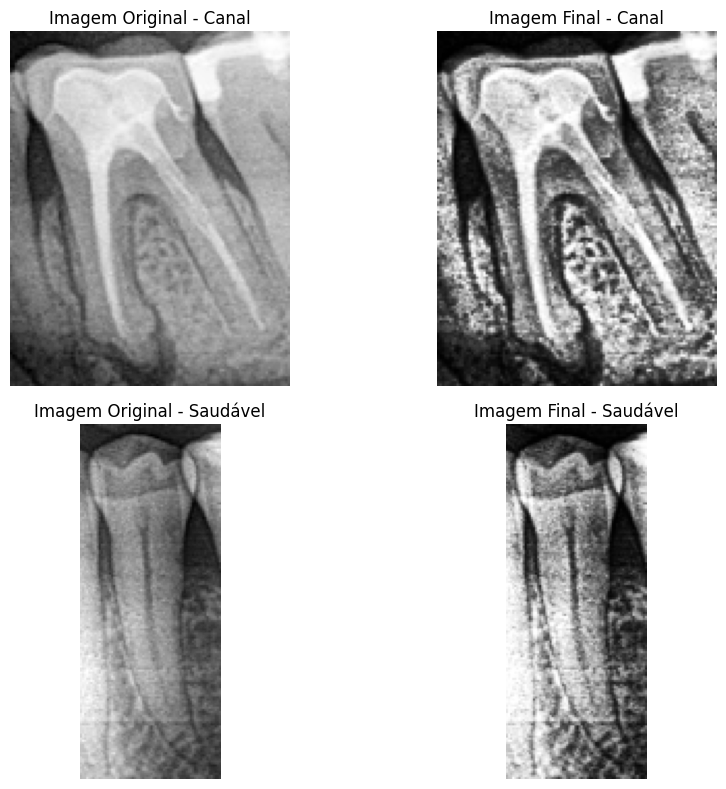

In [ ]:
def enhance_contrast(image):
    # Aplicar CLAHE
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8, 8))
    image = clahe.apply(image)

    # Equalização de Histograma
    image = cv2.equalizeHist(image)

    # Ajuste de Gama
    #gamma = 1.5
    #image = np.array(255*(image / 255) ** gamma, dtype='uint8')

    # Transformada de Potência
    #gamma = 0.5  # Inverso do gama usado acima
    #image = cv2.pow(image/255.0, gamma)
    #image = np.uint8(image*255)

    return image

final_image_canal = enhance_contrast(image_canal)
final_image_saudavel = enhance_contrast(image_saudavel)

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 8))

# Imagem original - Canal
axes[0, 0].imshow(image_canal, cmap='gray')
axes[0, 0].set_title("Imagem Original - Canal")
axes[0, 0].axis('off')  # Desativa a visualização dos eixos

# Imagem final - Canal
axes[0, 1].imshow(final_image_canal, cmap='gray')
axes[0, 1].set_title("Imagem Final - Canal")
axes[0, 1].axis('off')

# Imagem original - Saudável
axes[1, 0].imshow(image_saudavel, cmap='gray')
axes[1, 0].set_title("Imagem Original - Saudável")
axes[1, 0].axis('off')

# Imagem final - Saudável
axes[1, 1].imshow(final_image_saudavel, cmap='gray')
axes[1, 1].set_title("Imagem Final - Saudável")
axes[1, 1].axis('off')

plt.tight_layout()
plt.show()

# Rede


In [ ]:
def build_model(input_shape):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(128, activation='relu'),
        Dropout(0.5),
        Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Configuração do tamanho da entrada
input_shape = (150, 150, 1)

model = build_model(input_shape)
model.summary()


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        'data/train',
        target_size=(150, 150),
        batch_size=32,
        color_mode='grayscale',  # Raios-X são melhores tratados como imagens em escala de cinza
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        'data/validation',
        target_size=(150, 150),
        batch_size=32,
        color_mode='grayscale',
        class_mode='binary')

history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)
